#### Задача: Исследовать данные, найти зависимости и помочь выдвинуть гипотезы для команды Teddy Food. 
План работы:
1. Загрузить данные
2. Провести исследовательский анализ данных
    1. Проверить верное написание названий столбцов (все приведем к snake_case);
    2. Проверить формат данных;
    3. Проверить наличие пропусков в данных;
3. Объединить данные для выявления зависимостей
4. Проверить гипотезы:
    1. Средняя сумма пожертвования на собак и кошек отличается;
    2. Средняя сумма пожертвования на мальчиков и на девочек животных отличается;
    3. Средняя сумма пожертвования на породистых и не породистых животных отличается;
    4. Средняя сумма пожертвования на молодых животных (младше 5ти лет) и старших отличается;
    5. Средняя сумма пожертвования на животных из разных приютов отличается;
    6. Средняя сумма пожертвования на животных из разных городов отличается;
5. Рассмотреть влияние доступных характеристик животных на среднюю сумму пожертвования на них.

6. Построить модель бинарной классификации пользователей, где целевой переменной будет факт оттока пользователей в следующем месяце
    1. Разбить данные на обучающую и валидационную выборку
    - Обучить модель на train-выборке
        - Логистической регрессией
        - Случайным лесом
    - Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке.
    - Сравнить модели по метрикам - какая показала себя лучше на основании метрик?
7. Сделать кластеризацию пользователей
    1. Стандартизировать даные
    - Построить матрицу расстояний на стандартизованной матрице признаков и нарисовать дендрограмму - на ее основании предположить, какое количество кластеров можно выделить
    - Обучить модель кластеризации на основе алгоритма K-Means и спрогнозировать кластеры клиентов (общее число кластеров принять за 5)
    - Посмотреть на средние значения признаков для кластеров
    - Построить распределения признаков для кластеров
    - Для каждого кластера подсчитать долю оттока - отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие - надежны?
    
#### Данные:  
1. Teddy Food Транзакции по питомцам.csv:
    - name - кличка животного
    - pet_id - id животного
    - shelter - приют
    - operation - название услуги
    - price - сумма услуги
    - operation_date - дата операции
    - order_number - номер заказа
2. Teddy Food Описание питомцев.csv:
    - id - id животного
    - pet_name - кличка животного
    - profile_link - ссылка на страницу животного
    - shelter - приют
    - city - город
    - breed - порода
    - type - вид животного
    - birthdate - дата рождения
    - gender - пол
    - in_favourites - находится ли в избранном
    - already_at_home - уже забрали?
    - take_home - количество людей, которые отправили заявку чтобы взять животное домой
    - go_for_a_walk - сколько людей отметили, что хотят погулять с питомцем
 

In [30]:
#вначале импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from datetime import date
from scipy import stats as st

#### 1. Загрузить данные

In [2]:
transactions=pd.read_csv('C:/Users/Alexandr/Desktop/Anna/Яндекс Хакатон/Teddy Food Транзакции по питомцам.csv')
description=pd.read_csv('C:/Users/Alexandr/Desktop/Anna/Яндекс Хакатон/Teddy Food Описание питомцев.csv')

#### 2. Провести исследовательский анализ данных
    1. Проверить верное написание названий столбцов (все приведем к snake_case);
    2. Проверить формат данных;
    3. Проверить наличие пропусков в данных;

In [3]:
#изучим основную информацию о данных
display(transactions.head(5))
print('---')
display(transactions.info())
print('---')
display(transactions.describe())

,name,pet_id,shelter,operation,price,operation_date,order_number
0,Мадлен,1,"Самарский приют для животных ""НадеждА""","Игрушка для кошек ""Танцующая дразнилка""",95.0,2016-11-08 18:44:35,5944
1,Мадлен,1,"Самарский приют для животных ""НадеждА""","Игрушка для кошки ""Зооник Шуршик""",45.0,2016-11-08 18:44:35,5945
2,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5946
3,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5947
4,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5948


---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81527 entries, 0 to 81526
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            81527 non-null  object 
 1   pet_id          81527 non-null  int64  
 2   shelter         81527 non-null  object 
 3   operation       81527 non-null  object 
 4   price           81527 non-null  float64
 5   operation_date  81527 non-null  object 
 6   order_number    81527 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 4.4+ MB


None

---


,pet_id,price,order_number
count,81527.000000,81527.000000,81527.000000
mean,661.427184,175.689168,35426.484539
std,415.602624,295.215973,16446.448910
min,1.000000,0.000000,5944.000000
25%,332.000000,50.000000,21614.000000
50%,610.000000,98.000000,36025.000000
75%,1017.000000,155.000000,48711.000000
max,1565.000000,11042.000000,66896.000000


In [4]:
#изучим основную информацию о данных
display(description.head(5))
print('---')
display(description.info())
print('---')
display(description.describe())

,id,pet_name,profile_link,shelter,city,breed,type,birthdate,gender,in_favourites,already_at_home,take_home,go_for_a_walk
0,1,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0,1,0,0
1,2,Фифа,https://teddyfood.com/ru/animals/fifa/,Ковчег,Смоленск,Мейн-кун,Кошки,2000-03-03,девочка,0,1,0,0
2,3,Джинни,https://teddyfood.com/ru/animals/ginny/,"Стационар для Животных ""Сен Бернар""",Самара,Без породы,Кошки,2015-07-01,девочка,0,1,0,0
3,4,Партос,https://teddyfood.com/ru/animals/porthos/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2013-11-01,мальчик,0,1,0,0
4,5,Самуэль,https://teddyfood.com/ru/animals/samuel/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-04-01,мальчик,1,1,0,0


---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1554 non-null   int64 
 1   pet_name         1554 non-null   object
 2   profile_link     1554 non-null   object
 3   shelter          1554 non-null   object
 4   city             1554 non-null   object
 5   breed            1554 non-null   object
 6   type             1554 non-null   object
 7   birthdate        1554 non-null   object
 8   gender           1554 non-null   object
 9   in_favourites    1554 non-null   int64 
 10  already_at_home  1554 non-null   int64 
 11  take_home        1554 non-null   int64 
 12  go_for_a_walk    1554 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 158.0+ KB


None

---


,id,in_favourites,already_at_home,take_home,go_for_a_walk
count,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000
mean,781.516731,6.983912,0.738739,0.080438,0.191763
std,450.483767,9.963572,0.439463,0.346954,0.645383
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,392.250000,1.000000,0.000000,0.000000,0.000000
50%,782.500000,4.000000,1.000000,0.000000,0.000000
75%,1171.750000,9.000000,1.000000,0.000000,0.000000
max,1560.000000,109.000000,1.000000,3.000000,10.000000


In [5]:
#поменяем формат данных для дат:
transactions['operation_date']=pd.to_datetime(transactions['operation_date'], format='%Y-%m-%d %H:%M:%S')
description['birthdate']=pd.to_datetime(description['birthdate'], format='%Y-%m-%d %H:%M:%S')

In [6]:
#добавим информацию о породе в формате 1-породистый и 0-беспородистый
description.loc[description['breed'] == 'Без породы', 'breed_0_1'] = 0
description.loc[description['breed'] != 'Без породы', 'breed_0_1'] = 1
#а также подсчитаем количество лет животных
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
  
    return age 
description['age']=description['birthdate'].apply(lambda x: calculateAge(x))
#пол животного также переведем в категории 0 и 1
description.loc[description['gender'] == 'девочка', 'gender_0_1'] = 0
description.loc[description['gender'] == 'мальчик', 'gender_0_1'] = 1
#вид животного также переведем в категории 0 и 1
description.loc[description['type'] == 'Кошки', 'type_0_1'] = 0
description.loc[description['type'] == 'Собаки', 'type_0_1'] = 1

In [7]:
description

,id,pet_name,profile_link,shelter,city,breed,type,birthdate,gender,in_favourites,already_at_home,take_home,go_for_a_walk,breed_0_1,age,gender_0_1,type_0_1
0,1,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0,1,0,0,0.0,5,0.0,0.0
1,2,Фифа,https://teddyfood.com/ru/animals/fifa/,Ковчег,Смоленск,Мейн-кун,Кошки,2000-03-03,девочка,0,1,0,0,1.0,20,0.0,0.0
2,3,Джинни,https://teddyfood.com/ru/animals/ginny/,"Стационар для Животных ""Сен Бернар""",Самара,Без породы,Кошки,2015-07-01,девочка,0,1,0,0,0.0,5,0.0,0.0
3,4,Партос,https://teddyfood.com/ru/animals/porthos/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2013-11-01,мальчик,0,1,0,0,0.0,7,1.0,0.0
4,5,Самуэль,https://teddyfood.com/ru/animals/samuel/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-04-01,мальчик,1,1,0,0,0.0,5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1556,Фева,https://teddyfood.com/ru/animals/Feva_Matroskin/,Матроскин,Пермь,Без породы,Кошки,2017-11-30,девочка,0,1,0,0,0.0,2,0.0,0.0
1550,1557,Гром,https://teddyfood.com/ru/animals/Grom_Matroskin/,Матроскин,Пермь,Без породы,Кошки,2019-07-19,мальчик,5,0,0,0,0.0,1,1.0,0.0
1551,1558,Рэмбо,https://teddyfood.com/ru/animals/Rembo_Matroskin/,Матроскин,Пермь,Сиамская,Кошки,2012-03-01,мальчик,1,0,0,0,1.0,8,1.0,0.0
1552,1559,Банни,https://teddyfood.com/ru/animals/Banni_Matroskin/,Матроскин,Пермь,Без породы,Кошки,2017-07-15,мальчик,1,0,0,0,0.0,3,1.0,0.0


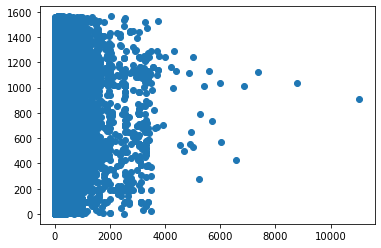

In [8]:
#проверим модель на выбросы, для этого посмотрим на распределение у скольки людей животное в избранном
plt.scatter(transactions['price'],transactions['pet_id'])

In [9]:
#избавимся от выбросов
trns_cl=transactions.query('price<6000').copy()

#### 3. Объединить данные для выявления зависимостей

In [10]:
#так как каждой транзакции соответствует питомец, на которого жертвуются деньги, добавим информацию о питомцах к информации о транзакциях
df=trns_cl.merge(description, how='inner', left_on='pet_id', right_on='id')

In [16]:
#прочитаем данные с пометками о категориях платежей
dfc=pd.read_excel('C:/Users/Alexandr/Desktop/Anna/Яндекс Хакатон/categories_4_merge.xlsx')

In [24]:
#объединим данные, чтобы проанализировать информацию
df=df.reset_index()
df=df.merge(dfc,left_on='index',right_on='id')

In [26]:
df['price'].mean()

175.03200991398882

In [27]:
df['price'].min()

0.0

In [28]:
df['price'].max()

5700.0

#### 4. Проверить гипотезы:
    1. Средняя сумма пожертвования на собак и кошек отличается;
    2. Средняя сумма пожертвования на мальчиков и на девочек животных отличается;
    3. Средняя сумма пожертвования на породистых и не породистых животных отличается;
    4. Средняя сумма пожертвования на молодых животных (младше 5ти лет) и старших отличается;
    5. Средняя сумма пожертвования на животных из разных приютов отличается;
    6. Средняя сумма пожертвования на животных из разных городов отличается;

In [38]:
#разделим данные по на собак и кошек, чтобы узнать, в среднем на одну транзакцию на кого жертвуют больше
cats=df.query('type_0_1==0')
dogs=df.query('type_0_1==1')

#проведем тест на сравнение средних данных по полу
alpha = .05 # критический уровень статистической значимости 
results = st.ttest_ind(cats['price'], dogs['price']) 

print('p-значение: ', results.pvalue )

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу") 
else: print("Не получилось отвергнуть нулевую гипотезу")
    
display(dogs['price'].mean()/cats['price'].mean())    
df.groupby('type').agg(avg_price=('price', 'mean'), count=('price','count'))

p-значение:  2.4298046118443536e-175
Отвергаем нулевую гипотезу


1.4620845699103477

,avg_price,count
type,,
Кошки,162.121268,67455
Собаки,237.035005,14046


In [39]:
#разделим данные на девочек и мальчиков, чтобы узнать, в среднем на одну транзакцию на кого жертвуют больше
girls=df.query('gender_0_1==0')
boys=df.query('gender_0_1==1')

#проведем тест на сравнение средних данных по полу
alpha = .05 # критический уровень статистической значимости 
results = st.ttest_ind(girls['price'], boys['price']) 

print('p-значение: ', results.pvalue )

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу") 
else: print("Не получилось отвергнуть нулевую гипотезу")
    
display(boys['price'].mean()/girls['price'].mean())
df.groupby('gender').agg(avg_price=('price', 'mean'), count=('price','count'))

p-значение:  2.5639594423897463e-08
Отвергаем нулевую гипотезу


1.067090919183459

,avg_price,count
gender,,
девочка,170.503394,49236
мальчик,181.942623,32265


In [40]:
#разделим данные на породистых и не породистых животных, чтобы узнать, в среднем на одну транзакцию на кого жертвуют больше
breed=df.query('breed_0_1==0')
no_breed=df.query('breed_0_1==1')

#проведем тест на сравнение средних данных по полу
alpha = .05 # критический уровень статистической значимости 
results = st.ttest_ind(breed['price'], no_breed['price']) 

print('p-значение: ', results.pvalue )

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу") 
else: print("Не получилось отвергнуть нулевую гипотезу")
    

display(no_breed['price'].mean()/breed['price'].mean())
df.groupby('breed_0_1').agg(avg_price=('price', 'mean'), count=('price','count'))

p-значение:  0.9849810552916254
Не получилось отвергнуть нулевую гипотезу


0.9994454312195723

,avg_price,count
breed_0_1,,
0.0,175.035846,78280
1.0,174.938777,3221


In [41]:
#разделим данные молодых и взрослых животных, чтобы узнать, в среднем на одну транзакцию на кого жертвуют больше
young=df.query('age<5')
old=df.query('age>=5')

#проведем тест на сравнение средних данных по полу
alpha = .05 # критический уровень статистической значимости 
results = st.ttest_ind(young['price'], old['price']) 

print('p-значение: ', results.pvalue )

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу") 
else: print("Не получилось отвергнуть нулевую гипотезу")
    

display(young['price'].mean()/old['price'].mean())
df.groupby('age').agg(avg_price=('price', 'mean'), count=('price','count'))

p-значение:  9.888989946890077e-19
Отвергаем нулевую гипотезу


1.1075062564275637

,avg_price,count
age,,
0,181.794118,34
1,180.276269,5087
2,194.043114,7058
3,182.654472,15279
4,180.192165,16132
5,161.717636,16203
6,165.777986,8718
7,166.175322,5370
8,162.905016,1848


In [44]:
#разделим данные на участников и неучастников промо, чтобы узнать, в среднем на одну транзакцию на кого жертвуют больше
promo=df.query('service_category=="Реклама"')
no_promo=df.query('service_category!="Реклама"')

#проведем тест на сравнение средних данных по полу
alpha = .05 # критический уровень статистической значимости 
results = st.ttest_ind(promo['price'], no_promo['price']) 

print('p-значение: ', results.pvalue )

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу") 
else: print("Не получилось отвергнуть нулевую гипотезу")
    

display(promo['price'].mean()/no_promo['price'].mean())
df.groupby('service_category').agg(avg_price=('price', 'mean'), count=('price','count'))

p-значение:  1.052134093693477e-29
Отвергаем нулевую гипотезу


0.6996588553691686

,avg_price,count
service_category,,
Бытовые нужды,56.203543,8551
Дни,206.450608,36595
Другое,285.648714,933
Игры,129.727614,176
Лечение,259.583105,15478
Питание,90.642422,15880
Реклама,124.242816,3888


In [45]:
df.columns

Index(['index', 'name', 'pet_id', 'shelter_x', 'operation', 'price',
       'operation_date', 'order_number', 'id_x', 'pet_name', 'profile_link',
       'shelter_y', 'city', 'breed', 'type', 'birthdate', 'gender',
       'in_favourites', 'already_at_home', 'take_home', 'go_for_a_walk',
       'breed_0_1', 'age', 'gender_0_1', 'type_0_1', 'id_y',
       'service_category'],
      dtype='object')

In [66]:
pets_new=df.groupby('pet_id').agg(name=('name','first'),shelter=('shelter_x','first'),operation=('operation','first'),avg_price=('price','mean'),operation_date=('operation_date','first'),city=('city','first'),breed=('breed','first'),type_1=('type','first'),birthdate=('birthdate','first'),gender=('gender','first'),in_favourites=('in_favourites','sum'),already_at_home=('already_at_home','first'),take_home=('take_home','sum'),go_for_a_walk=('go_for_a_walk','sum'),breed_0_1=('breed_0_1','first'),age=('age','first'),gender_0_1=('gender_0_1','first'),type_0_1=('type_0_1','first'))

In [67]:
df1 = df.groupby('pet_id')['service_category'].apply(list).reset_index(name='service_category')

In [68]:
pets_new.merge(df1,left_on='pet_id',right_on='pet_id',how='inner')

,pet_id,name,shelter,operation,avg_price,operation_date,city,breed,type_1,birthdate,gender,in_favourites,already_at_home,take_home,go_for_a_walk,breed_0_1,age,gender_0_1,type_0_1,service_category
0,1,Мадлен,"Самарский приют для животных ""НадеждА""","Игрушка для кошек ""Танцующая дразнилка""",394.285714,2016-11-08 18:44:35,Самара,Без породы,Кошки,2015-09-23,девочка,0,1,0,0,0.0,5,0.0,0.0,"[Игры, Игры, Питание, Питание, Питание, Питани..."
1,2,Фифа,Ковчег,Royal Canin,127.571429,2016-11-08 18:44:35,Смоленск,Мейн-кун,Кошки,2000-03-03,девочка,0,1,0,0,1.0,20,0.0,0.0,"[Бытовые нужды, Лечение, Бытовые нужды, Бытовы..."
2,3,Джинни,"Стационар для Животных ""Сен Бернар""",Пуревакс: вакцина для кошки (улучшенная),71.735849,2016-11-08 18:44:36,Самара,Без породы,Кошки,2015-07-01,девочка,0,1,0,0,0.0,5,0.0,0.0,"[Лечение, Питание, Лечение, Лечение, Лечение, ..."
3,4,Партос,"Самарский приют для животных ""НадеждА""","Глистогонное ""Мильбемакс"" (улучшенное)",71.171875,2016-11-08 18:44:36,Самара,Без породы,Кошки,2013-11-01,мальчик,0,1,0,0,0.0,7,1.0,0.0,"[Лечение, Лечение, Игры, Лечение, Питание, Леч..."
4,5,Самуэль,"Самарский приют для животных ""НадеждА""","Капли от блох и клещей ""Стронгхолд""",63.169355,2016-11-08 18:44:36,Самара,Без породы,Кошки,2015-04-01,мальчик,124,1,0,0,0.0,5,1.0,0.0,"[Лечение, Игры, Лечение, Питание, Лечение, Быт..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,1556,Фева,Матроскин,Порция вкуснейшего корма,39.000000,2020-04-04 13:52:53,Пермь,Без породы,Кошки,2017-11-30,девочка,0,1,0,0,0.0,2,0.0,0.0,[Питание]
1529,1557,Гром,Матроскин,Избавить питомца от паразитов,305.363636,2020-04-04 17:52:47,Пермь,Без породы,Кошки,2019-07-19,мальчик,110,0,0,0,0.0,1,1.0,0.0,"[Лечение, Лечение, Дни, Лечение, Лечение, Лече..."
1530,1558,Рэмбо,Матроскин,Избавить питомца от паразитов,181.937500,2020-04-06 17:06:40,Пермь,Сиамская,Кошки,2012-03-01,мальчик,16,0,0,0,1.0,8,1.0,0.0,"[Лечение, Лечение, Лечение, Лечение, Лечение, ..."
1531,1559,Банни,Матроскин,Кастрация питомца,339.142857,2020-04-07 06:52:17,Пермь,Без породы,Кошки,2017-07-15,мальчик,7,0,0,0,0.0,3,1.0,0.0,"[Лечение, Лечение, Лечение, Лечение, Лечение, ..."


In [69]:
#разделим данные на породистых и не породистых животных, чтобы узнать, в среднем на одну транзакцию на кого жертвуют больше
breed=pets_new.query('breed_0_1==0')
no_breed=pets_new.query('breed_0_1==1')

#проведем тест на сравнение средних данных по полу
alpha = .05 # критический уровень статистической значимости 
results = st.ttest_ind(breed['avg_price'], no_breed['avg_price']) 

print('p-значение: ', results.pvalue )

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу") 
else: print("Не получилось отвергнуть нулевую гипотезу")
    

display(no_breed['avg_price'].mean()/breed['avg_price'].mean())
pets_new.groupby('breed_0_1').agg(avg_price=('avg_price', 'mean'), count=('avg_price','count'))

p-значение:  0.7489160330205393
Не получилось отвергнуть нулевую гипотезу


1.0195370437556106

,avg_price,count
breed_0_1,,
0.0,184.003734,1462
1.0,187.598623,71


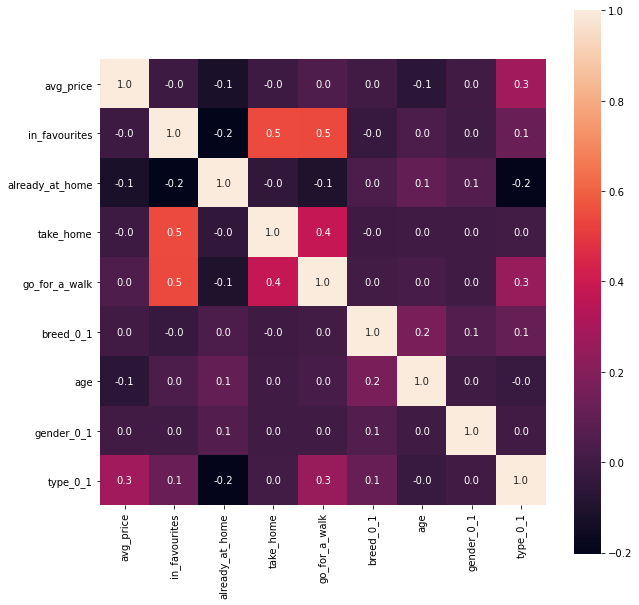

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pets_new.corr(),annot=True, square=True, fmt='.1f', ax=ax)

In [75]:
#рассмотрим баланс классов на нашей выборке
pets_new['already_at_home'].mean()
pets=pets_new[['avg_price', 'in_favourites','already_at_home', 'take_home', 'go_for_a_walk', 'breed_0_1', 'age', 'gender_0_1', 'type_0_1']]

In [76]:
# зададим порог
threshold = 0.3

# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = pets.drop(columns = ['already_at_home'], axis=1)
y = pets['already_at_home']

#разобьем данные на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(solver = 'lbfgs',random_state=0)
# обучим модель
lr_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]
# на основании вероятностей и соотношения классов рассчитаем predict
lr_custom_predictions = [0 if i<threshold else 1 for i in lr_probabilities]
# выведем все метрики
print_all_metrics(y_test, lr_custom_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)
# обучим модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
# на основании вероятностей и соотношения классов рассчитаем predict
rf_custom_predictions = [0 if i<threshold else 1 for i in rf_probabilities]
# выведем все метрики
print_all_metrics(y_test, rf_custom_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

C:\Users\Alexandr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Метрики для модели логистической регрессии:
	Accuracy: 0.76
	Precision: 0.75
	Recall: 1.00
Метрики для модели случайного леса:
	Accuracy: 0.75
	Precision: 0.76
	Recall: 0.96


In [73]:
pets_new.columns

Index(['name', 'shelter', 'operation', 'avg_price', 'operation_date', 'city',
       'breed', 'type_1', 'birthdate', 'gender', 'in_favourites',
       'already_at_home', 'take_home', 'go_for_a_walk', 'breed_0_1', 'age',
       'gender_0_1', 'type_0_1'],
      dtype='object')

In [77]:
# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
fi_df = pd.DataFrame(data ={'feature': X.columns, 'importance': rf_model.feature_importances_ })
fi_df.sort_values('importance', ascending = False)

,feature,importance
0,avg_price,0.359308
1,in_favourites,0.350218
5,age,0.138178
3,go_for_a_walk,0.049001
7,type_0_1,0.035107
2,take_home,0.030159
6,gender_0_1,0.028179
4,breed_0_1,0.009851


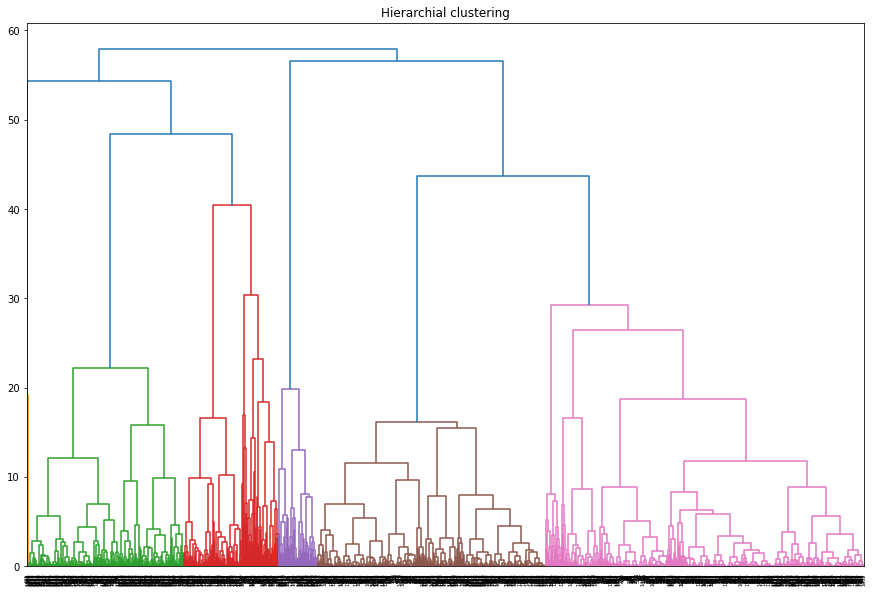

In [78]:
#Стандартизируем данные 
scaler = StandardScaler()
pet_st = scaler.fit_transform(pets)

#Пострим матрицу расстояний
#сохраненим таблицу «связок» между объектами
linked = linkage(pet_st, method = 'ward')

#нарисуем дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show()


In [79]:
# стандартизируем данные
sc = StandardScaler() 
pet_sc = sc.fit_transform(pets.drop('already_at_home', axis=1))
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)
# прогнозируем кластеры для наблюдений 
labels = km.fit_predict(pet_sc)
# сохраняем метки кластера в поле нашего датасета
pets['cluster_km'] = labels
# выводим статистику по средним значениям наших признаков по кластеру
display(pets.groupby(['cluster_km']).mean().style.background_gradient(cmap='PuBu',axis=0))

<ipython-input-79-0a3671063ead>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pets['cluster_km'] = labels


,avg_price,in_favourites,already_at_home,take_home,go_for_a_walk,breed_0_1,age,gender_0_1,type_0_1
cluster_km,,,,,,,,,
0,174.301849,649.941499,0.793419,4.740402,8.197441,0.000000,4.265082,1.000000,0.000000
1,176.265161,647.394293,0.743191,5.136187,10.752270,0.000000,4.278859,0.000000,0.000000
2,187.598623,452.507042,0.816901,7.211268,24.126761,1.000000,6.239437,0.535211,0.253521
3,183.544734,29089.000000,0.416667,306.833333,781.500000,0.000000,4.916667,0.416667,0.500000
4,269.449784,1782.598485,0.446970,9.424242,56.015152,0.000000,4.090909,0.416667,0.984848
